<a href="https://colab.research.google.com/github/lisagirard/Music-Culture/blob/main/LisaGirard_Capstone_Radio_Data_in_a_Digital_Age_DSFlex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lisa Girard <br>
Data Science Flex - Thinkful <br>
Capstone #1.2 - 8.16.22<br>

**Tracking Charting History on the Billboard Hot 100 Data Set**

The Billboard Hot 100 is one of Billboard Magazine’s definitive music charts and is powered by Luminate, the entertainment industry data powerhouse. The week’s most popular songs are ranked by audio and video streaming activity on leading digital music services, radio airplay audience impressions based on monitored airplay, and sales data. A publicly-available dataset of all "Hot 100" charts released since its inception in 1958 through November 6, 2021 can be found online at https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

**RESEARCH PROPOSAL:**<hr>

When looking at past and current trends in the data set, I noted that power gold hits released prior to 1999 did not chart as long as hits in the “digital age” - post 1999. I propose to do an A/B test to compare chart time - known as “weeks-on-board” -  of songs released from 1976-1998 (A) to chart time of songs released after 1999 (B),  the year digital music proliferation began, so that stakeholders can make data-driven decisions regarding content distribution, marketing, and audience development. 


**METHODS:**<hr>
I will segment the data to include two time frames:
* 1976-1998 - 22 years of chart history prior to the 1999 milestone of the advent of digital file sharing (A)
* 1999-2021 - 22 years of chart history (B) <br><Br>
I will test each time-frame dataset (A/B) for sample size, normal distribution, skew and kurtosis, histogram plotting, two-tailed t-test to determine hypothesis rejection, and confidence interval determination.


**HYPOTHESES:** <hr>
H0 - Songs charted from 1976-1998 did not have significantly different chart times than songs released after 1999. <br>
H1 -  Songs charted from 1999-2021 did have significantly different chart times (longer) than songs released between 1976-1998. 




**WHY:** <hr>
The biggest stakeholders, or audience, in the music industry that consumes and consults the data output from Billboard Magazine’s charts are: 
* Record labels
* Artists
* Streaming services (subscription monetization / ad sales)
* Traditional broadcast radio stations (ad sales model)
* Satellite radio stations (subscription monetization)

Ultimately, these stakeholders are seeking **return on investment** and **potential for additional monetization**. Examining the past charting history helps to understand why current charting trends and future charting potential matter in context of what and how artists and distribution channels can be better monetized and managed. 
<br><Br>
Knowing current charting trends can drive decisions regarding radio clock programming, tour scheduling, album/song releases, artistic creative output, merchandise support, advertising sales (for both online streaming and traditional broadcast radio), and for audience development in both traditional broadcast radio and subscription-driven distribution (online streaming platforms like Spotify and Sirius XM Satellite Radio.) 

Research Proposal Google Doc at: https://docs.google.com/document/d/1dbOgAfoE25N4wGUV8RfK_WG-iEnprlDQvaUjSueINP8/edit?usp=sharing


## DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from collections import Counter
from numpy.random import seed
#pd.options.display.max_rows = 999
pd.options.display.max_rows = 500
import seaborn as sns 
sns.set()
from scipy import stats
from scipy.stats import pearsonr
from numpy import mean
from numpy import var
from math import sqrt
import math
import statsmodels.api as sm


#collect the entire dataframe
billboard_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/billboard_charts.csv")

In [ ]:
#get an idea of the DF datatypes and counts
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


In [ ]:
#check for nulls
billboard_df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

In [ ]:
billboard_df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
#create a dataframe with date,song for 1976 to 1998
bb_1976to1998 = billboard_df[(billboard_df['date'] <= '1998-12-31') & (billboard_df['date'] >= '1976-01-01')  & (billboard_df['song'])]

In [ ]:
bb_1976to1998.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119987 entries, 119300 to 239286
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            119987 non-null  object 
 1   rank            119987 non-null  int64  
 2   song            119987 non-null  object 
 3   artist          119987 non-null  object 
 4   last-week       110718 non-null  float64
 5   peak-rank       119987 non-null  int64  
 6   weeks-on-board  119987 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 7.3+ MB


In [ ]:
#check for nulls
bb_1976to1998.isnull().sum()

date                 0
rank                 0
song                 0
artist               0
last-week         9269
peak-rank            0
weeks-on-board       0
dtype: int64

In [ ]:
#create a dataframe with date, song for 1999 to 2021
bb_after99 = billboard_df[(billboard_df['date'] >= '1999-01-01') & (billboard_df['date'] <= '2022-01-01') & (billboard_df['song'])]


In [ ]:
bb_after99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119300 entries, 0 to 119299
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            119300 non-null  object 
 1   rank            119300 non-null  int64  
 2   song            119300 non-null  object 
 3   artist          119300 non-null  object 
 4   last-week       107958 non-null  float64
 5   peak-rank       119300 non-null  int64  
 6   weeks-on-board  119300 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 7.3+ MB


In [ ]:
#check for nulls
bb_after99.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         11342
peak-rank             0
weeks-on-board        0
dtype: int64

BOTH DATAFRAMES HAVE SIMILAR NUMBER OF ROWS - COMPARABLE DATA SETS, LARGE DATASET TO WORK WITH

# 3000-ROW RANDOM SAMPLE 

To account for bias - I will take a 3000 random sample from pre-1999 and post-1999 dataframes. I will make this a smaller sample size so that I can affectively apply Shapiro Wilk testing (most affective for sample sizes less than 5000) to help determine distribution normality.


In [ ]:
#generate 3000 row dataframe for pre 1999
pre99_3kr = bb_1976to1998.sample(n=3000)

In [ ]:
#check years/date
pre99_3kr.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
155208,1992-02-08,9,Finally,CeCe Peniston,7.0,5,20
185302,1986-05-03,3,Kiss,Prince And The Revolution,1.0,1,11
154897,1992-03-07,98,You're All That Matters To Me,Curtis Stigers,NaN,98,1
184806,1986-06-07,7,Something About You,Level 42,7.0,7,17
230220,1977-09-24,21,You Light Up My Life,Debby Boone,35.0,21,4


In [ ]:
#look at info
pre99_3kr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 155208 to 181645
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3000 non-null   object 
 1   rank            3000 non-null   int64  
 2   song            3000 non-null   object 
 3   artist          3000 non-null   object 
 4   last-week       2761 non-null   float64
 5   peak-rank       3000 non-null   int64  
 6   weeks-on-board  3000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 187.5+ KB


In [ ]:
#generate 3000 row dataframe for post 1999
post99_3kr = bb_after99.sample(n=3000)

In [ ]:
post99_3kr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 112890 to 68909
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3000 non-null   object 
 1   rank            3000 non-null   int64  
 2   song            3000 non-null   object 
 3   artist          3000 non-null   object 
 4   last-week       2699 non-null   float64
 5   peak-rank       3000 non-null   int64  
 6   weeks-on-board  3000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 187.5+ KB


In [ ]:
#check years/date
post99_3kr.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
112890,2000-03-25,91,The Great Beyond,R.E.M.,79.0,57,14
15914,2018-10-20,15,Never Recover,Lil Baby & Gunna Featuring Drake,NaN,15,1
76875,2007-02-17,76,White & Nerdy,"""Weird Al"" Yankovic",65.0,9,19
22724,2017-07-01,25,Malibu,Miley Cyrus,26.0,10,6
68148,2008-10-18,49,Shake It,Metro Station,38.0,10,27


## ACCOUNTING FOR NULLS

In [ ]:
#checking for nulls
pre99_3kr.isnull().sum()

date                0
rank                0
song                0
artist              0
last-week         239
peak-rank           0
weeks-on-board      0
dtype: int64

In [ ]:
#checking for nulls
post99_3kr.isnull().sum()

date                0
rank                0
song                0
artist              0
last-week         301
peak-rank           0
weeks-on-board      0
dtype: int64

In [ ]:
#droping nulls
pre99_3kr_dropped = pre99_3kr.dropna()

In [ ]:
#dropping nulls
post99_3kr_dropped = post99_3kr.dropna()

In [ ]:
pre99_3kr_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761 entries, 155208 to 181645
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2761 non-null   object 
 1   rank            2761 non-null   int64  
 2   song            2761 non-null   object 
 3   artist          2761 non-null   object 
 4   last-week       2761 non-null   float64
 5   peak-rank       2761 non-null   int64  
 6   weeks-on-board  2761 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 172.6+ KB


In [ ]:
post99_3kr_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2699 entries, 112890 to 68909
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2699 non-null   object 
 1   rank            2699 non-null   int64  
 2   song            2699 non-null   object 
 3   artist          2699 non-null   object 
 4   last-week       2699 non-null   float64
 5   peak-rank       2699 non-null   int64  
 6   weeks-on-board  2699 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 168.7+ KB


In [ ]:
pre99_3kr_dropped.isnull().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
dtype: int64

In [ ]:
post99_3kr_dropped.isnull().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
dtype: int64

In [ ]:
#check years/date
pre99_3kr_dropped.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
155208,1992-02-08,9,Finally,CeCe Peniston,7.0,5,20
185302,1986-05-03,3,Kiss,Prince And The Revolution,1.0,1,11
184806,1986-06-07,7,Something About You,Level 42,7.0,7,17
230220,1977-09-24,21,You Light Up My Life,Debby Boone,35.0,21,4
133056,1996-05-11,57,Tres Delinquentes,Delinquent Habits,61.0,57,3


In [ ]:
#check years/date
post99_3kr_dropped.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
112890,2000-03-25,91,The Great Beyond,R.E.M.,79.0,57,14
76875,2007-02-17,76,White & Nerdy,"""Weird Al"" Yankovic",65.0,9,19
22724,2017-07-01,25,Malibu,Miley Cyrus,26.0,10,6
68148,2008-10-18,49,Shake It,Metro Station,38.0,10,27
35542,2015-01-17,43,Shotgun Rider,Tim McGraw,41.0,38,14


In [ ]:
stats.describe(pre99_3kr_dropped['weeks-on-board'])

DescribeResult(nobs=2761, minmax=(2, 60), mean=9.720028975009054, variance=40.68354434698623, skewness=1.3417622193832102, kurtosis=3.7999434950368425)

In [ ]:
stats.describe(post99_3kr_dropped['weeks-on-board'])

DescribeResult(nobs=2699, minmax=(2, 60), mean=12.525009262689885, variance=77.40143138427297, skewness=1.3395426900751615, kurtosis=2.3510099219885845)

STATS DESCRIBE SHOW BOTH "PRE99 3KR DROPPED" AND "POST99 3KR DROPPED" AS SKEWED (>1)  AND HIGH KURTOSIS (>3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


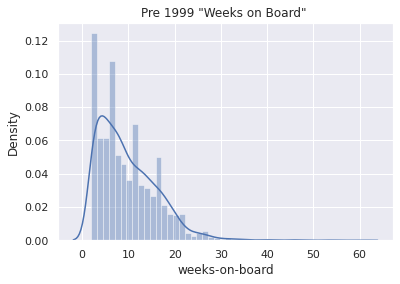

In [ ]:
sns.distplot(pre99_3kr_dropped['weeks-on-board'])
plt.title('Pre 1999 "Weeks on Board" ')
plt.show()

**pre99 3kr dropped is definitley right skewed**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


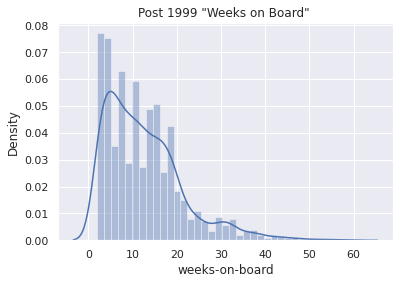

In [ ]:
sns.distplot(post99_3kr_dropped['weeks-on-board'])
plt.title('Post 1999 "Weeks on Board" ')
plt.show()

**post99_3kr_dropped is definitely right skewed as well**

<hr>


# CHECKING FOR OUTLIERS

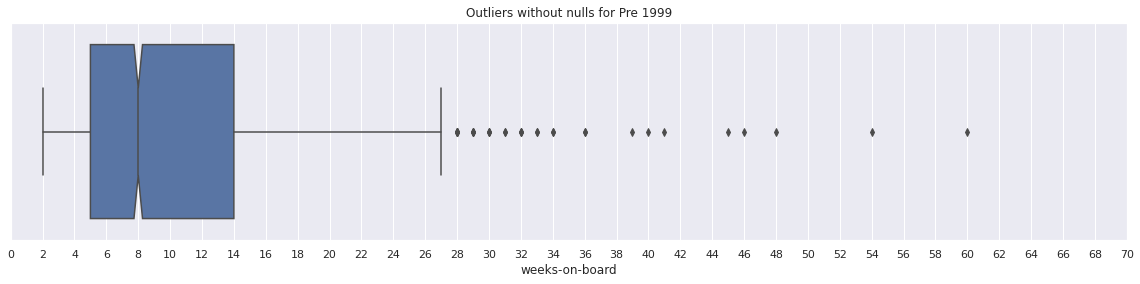

In [ ]:
#chekcing for outliers with boxplot for PRE99
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = pre99_3kr_dropped['weeks-on-board'], notch=True)
plt.title("Outliers without nulls for Pre 1999")
plt.xlim(0, 70)
plt.locator_params(axis='x', nbins=35)
plt.show()

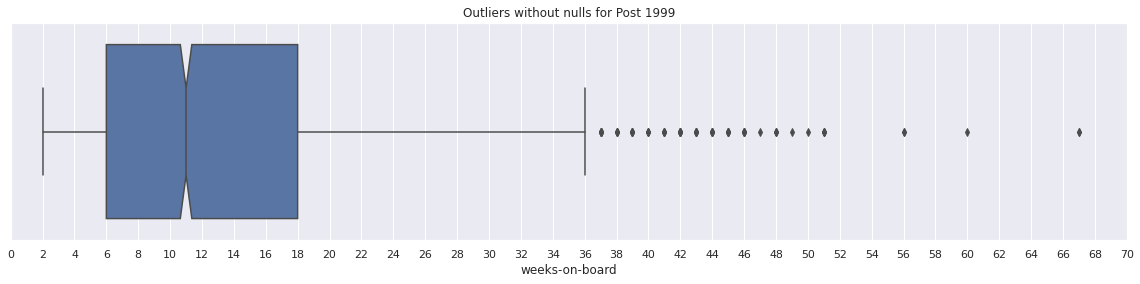

In [ ]:
#checking for outliers with boxplot on POST1999
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = post99_3kr_dropped['weeks-on-board'],notch = True)
plt.title("Outliers without nulls for Post 1999")
plt.xlim(0, 70)
plt.locator_params(axis='x', nbins=35)
plt.show()

EVEN LOOKING AT BOXPLOTS FOR RANDOM 3K DROPPED SAMPLES SHOWS THAT POST1999 CHARTED LONGER THAN PRE99.  

AVG WEEKS-ON-BOARD FOR PRE99 IS CONSISTENTLY AT 8 WEEKS (through many runs).

AVG WEEKS-ON-BOARD FOR POST99 IS CONSISTENTLY 11 WEEKS (through many runs).

# DROPPING OUTLIERS WITH CALC'D IQR

going to calculate the upper and lower limits instead of hard qty limit


In [ ]:
pre99_3kr_dropped[['weeks-on-board']].describe()

,weeks-on-board
count,2755.00000
mean,9.72196
std,6.35574
min,2.00000
25%,5.00000
50%,8.00000
75%,14.00000
max,46.00000


In [ ]:
pre99_3kr_dropped['weeks-on-board'].quantile(0.25)

5.0

In [ ]:
pre99_3kr_dropped['weeks-on-board'].quantile(0.75)

14.0

In [ ]:
Q1 = pre99_3kr_dropped['weeks-on-board'].quantile(0.25)
Q3 = pre99_3kr_dropped['weeks-on-board'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

9.0

In [ ]:
upper_lim = Q1 - 1.5 * IQR
lower_lim = Q3 + 1.5 * IQR

In [ ]:
lower_lim

27.5

In [ ]:
upper_lim

-8.5

In [ ]:
pre99_dropouts_low = (pre99_3kr_dropped['weeks-on-board'] < lower_lim ) #inclusive (gather data less than lower lim wich is 27.5)

In [ ]:
len(pre99_dropouts_low)


2755

In [ ]:
pre99_dropouts_up = (pre99_3kr_dropped['weeks-on-board'] > upper_lim ) #inclusive (gather data greater than upper lim which is -8.5 - which will be everything because everything is greater than -7 )

In [ ]:
len(pre99_dropouts_up)

2755

In [ ]:
#this DF has outliers removed
pre99_dropouts = pre99_3kr_dropped[(pre99_3kr_dropped['weeks-on-board'] < lower_lim)  & (pre99_3kr_dropped['weeks-on-board'] > upper_lim)]

In [ ]:
len(pre99_dropouts)

2717

In [ ]:
#all of the outliers
pre99_dropouts_exclusive = pre99_3kr_dropped[(pre99_3kr_dropped['weeks-on-board'] > lower_lim)]

In [ ]:
len(pre99_dropouts_exclusive)

38

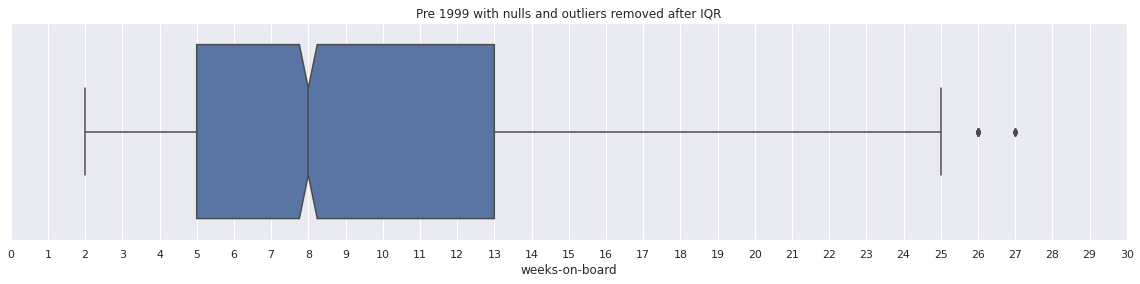

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = pre99_dropouts['weeks-on-board'], notch =  True)
plt.title("Pre 1999 with nulls and outliers removed after IQR")
plt.xlim(0, 30)
plt.locator_params(axis='x', nbins=35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


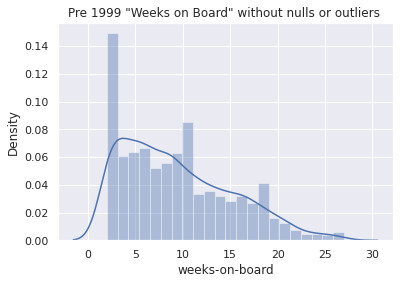

In [ ]:
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(pre99_dropouts['weeks-on-board'])
plt.title('Pre 1999 "Weeks on Board" without nulls or outliers ')
plt.show()

In [ ]:
#calculate for POST99 now
post99_3kr_dropped[['weeks-on-board']].describe()

,weeks-on-board
count,2701.000000
mean,13.038504
std,9.216893
min,2.000000
25%,6.000000
50%,11.000000
75%,18.000000
max,67.000000


In [ ]:
post99_3kr_dropped['weeks-on-board'].quantile(0.25)

NameError: ignored

In [ ]:
post99_3kr_dropped['weeks-on-board'].quantile(0.75)

18.0

In [ ]:
Q1 = post99_3kr_dropped['weeks-on-board'].quantile(0.25)
Q3 = post99_3kr_dropped['weeks-on-board'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

12.0

In [ ]:
upper_lim = Q1 - 1.5 * IQR
lower_lim = Q3 + 1.3* IQR #i addjusted the limit here to include the 34s and 35s I kept catching

In [ ]:
lower_lim

33.6

In [ ]:
upper_lim

-12.0

In [ ]:
post99_dropouts_low = (post99_3kr_dropped['weeks-on-board'] < lower_lim ) #inclusive (gather data less than lower lim wich is 27.5)

In [ ]:
len(post99_dropouts_low)


2701

In [ ]:
post99_dropouts_up = (post99_3kr_dropped['weeks-on-board'] > upper_lim ) #inclusive (gather data greater than upper lim which is -10.5 - which will be everything because everything is greater than -7 )

In [ ]:
len(post99_dropouts_up)

2701

In [ ]:
#this DF has outliers removed
post99_dropouts= post99_3kr_dropped[(post99_3kr_dropped['weeks-on-board'] < lower_lim)  & (post99_3kr_dropped['weeks-on-board'] > upper_lim)]

In [ ]:
len(post99_dropouts)

2593

In [ ]:
#all of the outliers
post99_dropouts_exclusive = post99_3kr_dropped[(post99_3kr_dropped['weeks-on-board'] > lower_lim)]

In [ ]:
len(post99_dropouts_exclusive)

108

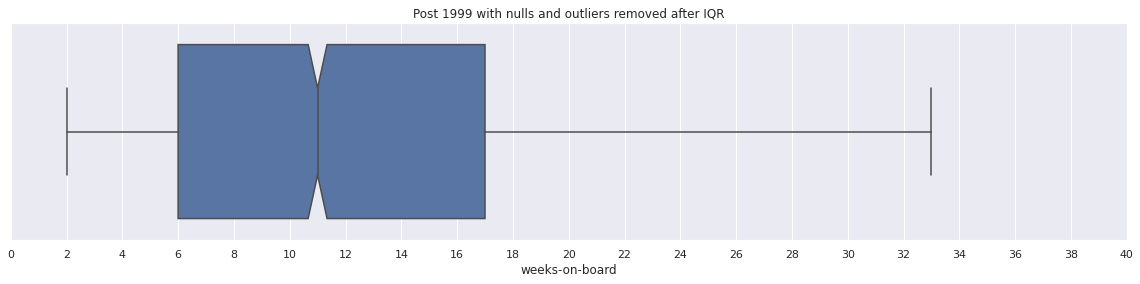

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = post99_dropouts['weeks-on-board'], notch = True)
plt.title("Post 1999 with nulls and outliers removed after IQR")
plt.xlim(0, 40)
plt.locator_params(axis='x', nbins=35)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


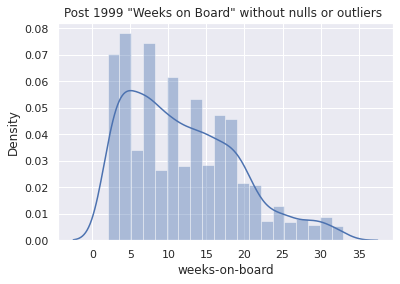

In [ ]:
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(post99_dropouts['weeks-on-board'])
plt.title('Post 1999 "Weeks on Board" without nulls or outliers ')
plt.show()

In [ ]:
stats.shapiro(post99_dropouts['weeks-on-board'])

ShapiroResult(statistic=0.9447929859161377, pvalue=4.0655877074036916e-30)

In [ ]:
stats.shapiro(pre99_dropouts['weeks-on-board'])

ShapiroResult(statistic=0.9367316961288452, pvalue=1.5425027889322065e-32)

SHAPIRO INDICATES NOT NORMAL for pre99_dropouts and post99_dropouts - LOW P-VALUE ("This is a statistical test used to infer whether a variable's distribution is significantly different than normal.")

In [ ]:
stats.describe(post99_dropouts['weeks-on-board'])
#negative kurtosis here probably indicates it's really platykurtic and not normal

NameError: ignored

In [ ]:
stats.describe(pre99_dropouts['weeks-on-board'])

DescribeResult(nobs=2717, minmax=(2, 27), mean=9.398601398601398, variance=33.07043986940894, skewness=0.6803864467314997, kurtosis=-0.3117797132489315)

# DROPPING OUTLIERS (manual calc with hard qty limit (26 and 32)


In [ ]:
## COLLECTING JUST THE PRE's OF 26 WEEKS OR LESS
pre_dropouts_manual= pre99_3kr_dropped[(pre99_3kr_dropped['weeks-on-board']<26) & (pre99_3kr_dropped['date'] <= '1998-12-31') & (pre99_3kr_dropped['date'] >= '1976-01-01')]


In [ ]:
pre_dropouts_manual.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
219600,1979-10-06,1,Sad Eyes,Robert John,2.0,1,21
143842,1994-04-16,43,"Hey D.J. (From ""Mi Vida Loca"")",Lighter Shade Of Brown,51.0,43,9
163159,1990-08-04,60,Ready Or Not,After 7,45.0,7,19
166754,1989-11-25,55,It's No Crime,Babyface,42.0,7,16
150195,1993-01-30,96,This Could Be The One,Bad Company,91.0,87,7


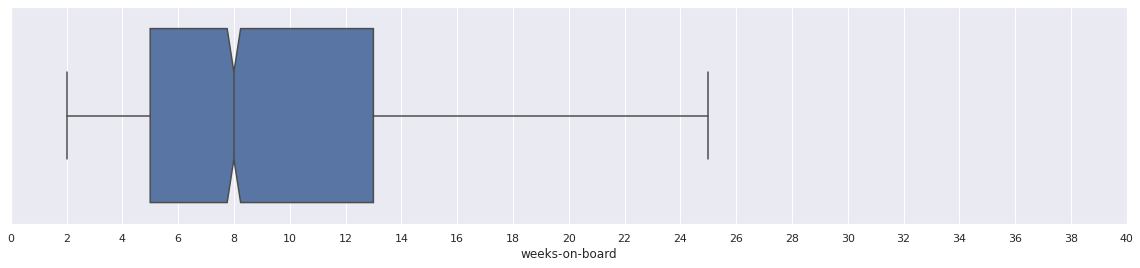

In [ ]:
#checking for outliers with boxplot PRE 1999 with no outliers
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = pre_dropouts_manual['weeks-on-board'],notch = True)
plt.xlim(0, 40)
plt.locator_params(axis='x', nbins=35)
plt.show()

In [ ]:
post_dropouts_manual = post99_3kr_dropped[(post99_3kr_dropped['weeks-on-board'] < 32) & (post99_3kr_dropped['date'] <= '2022-01-01') & (post99_3kr_dropped['date'] >= '1999-01-01')]

In [ ]:
post_dropouts_manual.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
97953,2003-02-01,54,Disease,matchbox twenty,51.0,29,16
18715,2018-04-07,16,All The Stars,Kendrick Lamar & SZA,14.0,7,12
67479,2008-12-06,80,Waitin' On A Woman,Brad Paisley,66.0,44,20
43350,2013-07-20,51,See You Again,Carrie Underwood,52.0,51,10
58285,2010-09-11,86,The Man Who Can't Be Moved,The Script,90.0,86,4


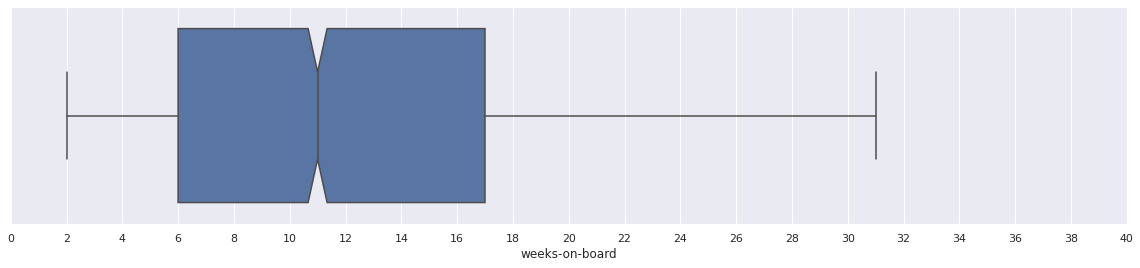

In [ ]:
#checking for outliers with boxplot POST 1999 with no outliers
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = post_dropouts_manual['weeks-on-board'],notch = True)
plt.xlim(0, 40)
plt.locator_params(axis='x', nbins=35)
plt.show()

In [ ]:
stats.describe(pre_dropouts_manual['weeks-on-board'])


DescribeResult(nobs=2699, minmax=(2, 25), mean=9.286031863653205, variance=31.37627257274267, skewness=0.6184785376986092, kurtosis=-0.4990663458788722)

In [ ]:
stats.describe(post_dropouts_manual['weeks-on-board'])

DescribeResult(nobs=2571, minmax=(2, 31), mean=11.690392843251653, variance=49.14379482615888, skewness=0.6151662384992841, kurtosis=-0.32185489873620154)

STATS DESCRIBE FOR "PRE_DROPOUTS" AND "POST_dROPOUTS" ARE MUCH MORE 'NORMAL' - NOT SKEWED, NO KURTOSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


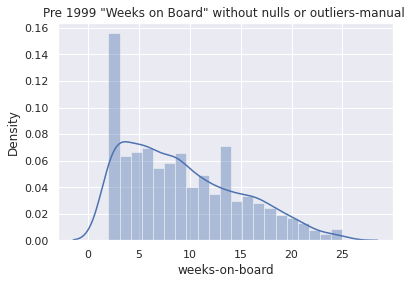

In [ ]:
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(pre_dropouts_manual['weeks-on-board'])
plt.title('Pre 1999 "Weeks on Board" without nulls or outliers-manual ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


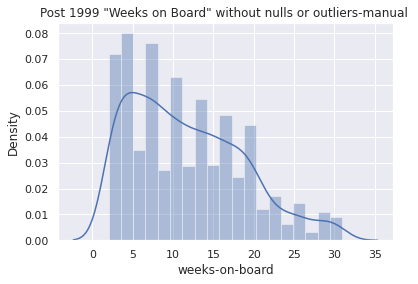

In [ ]:
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(post_dropouts_manual['weeks-on-board'])
plt.title('Post 1999 "Weeks on Board" without nulls or outliers-manual ')
plt.show()

In [ ]:
stats.shapiro(pre_dropouts_manual['weeks-on-board'])

ShapiroResult(statistic=0.9382724761962891, pvalue=4.0607611040893283e-32)

In [ ]:
stats.shapiro(post_dropouts_manual['weeks-on-board'])

ShapiroResult(statistic=0.9481145739555359, pvalue=3.218689354698401e-29)

SHAPIRO INDICATES NOT NORMAL - LOW PVALUE ("This is a statistical test used to infer whether a variable's distribution is significantly different than normal.")

<hr>

# CHECKING FOR RELATION WITH PEARSONS

need same sample size for Pearson. Will create 1500 line sample

In [ ]:
#pre99_pearson = pre99_3kr_dropped.iloc[0:1500] #these still have outliers

In [ ]:
#post99_pearson = post99_3kr_dropped.iloc[0:1500] #these still have outliers

In [ ]:
pre_dropouts_pearson = pre99_dropouts.iloc[0:1500]

In [ ]:
post_dropouts_pearson = post99_dropouts.iloc[0:1500]

In [ ]:
pre_dropouts_pearson.info(), post_dropouts_pearson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 219600 to 197845
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   rank            1500 non-null   int64  
 2   song            1500 non-null   object 
 3   artist          1500 non-null   object 
 4   last-week       1500 non-null   float64
 5   peak-rank       1500 non-null   int64  
 6   weeks-on-board  1500 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 93.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 97953 to 110588
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   rank            1500 non-null   int64  
 2   song            1500 non-null   object 
 3   artist          1500 non-null   object 
 4   last-week       1500 non-null   

(None, None)

In [ ]:
#pearson correlation
corr, _ = pearsonr(pre_dropouts_pearson['weeks-on-board'], post_dropouts_pearson['weeks-on-board'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.018


Pearson's correlation is close to 0.0 therefore indicating NO RELATIONSHIP between pre and post "dropouts" version which has no nulls and no outliers

CALCULATING COHEN'S D FOR MORE RELATIONSHIP TESTING

In [ ]:
n1, n2 = len(pre99_dropouts['weeks-on-board']), len(post99_dropouts['weeks-on-board'])

In [ ]:
print(n1,n2)

2717 2593


In [ ]:
	# calculate the variance of the samples
	s1, s2 = var(pre99_dropouts['weeks-on-board'], ddof=1), var(post99_dropouts['weeks-on-board'], ddof=1)

In [ ]:
print(s1, s2)

33.07043986940894 52.37310863054853


In [ ]:
def variance(data):
#nummber of observations
  n = len(data)
     # Mean of the data
  mean = sum(data) / n
     # Square deviations
  deviations = [(x - mean) ** 2 for x in data]
    # Variance
  variance = sum(deviations) / n
  return variance


pre99_var = variance(pre99_dropouts['weeks-on-board'])
print("pre99_dropouts variance: ", pre99_var)

pre99_dropouts variance:  33.05826819481545


In [ ]:
def variance(data):
#nummber of observations
  n = len(data)
     # Mean of the data
  mean = sum(data) / n
     # Square deviations
  deviations = [(x - mean) ** 2 for x in data]
    # Variance
  variance = sum(deviations) / n
  return variance


post99_var = variance(post99_dropouts['weeks-on-board'])
print("post99_dropouts variance: ", post99_var)

post99_dropouts variance:  52.35291074831543


In [ ]:
# calc Standard Deviation
sd = sqrt(((n1-1) * pre99_var + (n2 - 1) * post99_var) / (n1 + n2 - 2))

In [ ]:
print(sd)

6.517685075309362


In [ ]:
# calculate the means of the samples
u1 = mean(pre99_dropouts['weeks-on-board'])

In [ ]:
u2 = mean(post99_dropouts['weeks-on-board'])

In [ ]:
print(u1, u2)

9.398601398601398 11.866949479367529


In [ ]:
# calculate the effect size (aka Cohen's d)
effect_size =  (u1 - u2) / sd

In [ ]:
print(effect_size)

-0.3787154568294281


Small Effect Size: d=0.20 <br>
Medium Effect Size: d=0.50 <br>
Large Effect Size: d=0.80 <br>

Effect Size is small. <br>
Considering "post99" DID stay on charts longer, the mean would be larger, and the Effect Size is negative because a smaller number (pre99) is subtracting a larger number (post99).  In this case, we could reverse the math (post99 minus pre99 for a positive number) or we could just take the absolute value of 0.3 and make our assumption based on 0.3 being relatively small for effect size. <br><br>
In addition to Pearson's correlation - this small effect size indicates also that there is no relationship between our two variables "pre_dropouts 'weeks-on-board' " and "post_dropouts 'weeks-on-board' "

# DISTRIBUTION TESTING FOR NORMALITY

I am going to stick with my random pre99_dropouts and post99_dropouts varibales to account for bias, sample size, and no nulls, and no outliers.

**Skew and Kurtosis interpretations**

In [ ]:
# WRITING A FUNCTION TO PERFORM REPETITIVE stats.describe()
def describe(pre, post):
  pre_stats = stats.describe(pre)
  post_stats = stats.describe(post)
  return (f"preStats: {pre_stats}.",f"PostStats: {post_stats}")

describe (pre99_dropouts['weeks-on-board'], post99_dropouts['weeks-on-board'])

('preStats: DescribeResult(nobs=2717, minmax=(2, 27), mean=9.398601398601398, variance=33.07043986940894, skewness=0.6803864467314997, kurtosis=-0.3117797132489315).',
 'PostStats: DescribeResult(nobs=2593, minmax=(2, 33), mean=11.866949479367529, variance=52.37310863054853, skewness=0.6833770976978091, kurtosis=-0.14973670319957044)')

**with outliers stripped ==> presents more normal**

Pre99 SKEW and KURTOSIS: <br>
skew = ~ 0.6x ==> less than 1  ==> looks normal (moderate skew at btw 0.5 and 1) <br>
kurtosis = ~ -0.3x ==> less than 3 ==>  looks normal <br>

Post99 SKEW and KURTOSIS: <br>
skew = ~ 0.6x ==> less than 1  ==> looks normal (moderate skew at btw 0.5 and 1) <br>
kurtosis = ~ -0.3x ==> less than 3 ==>  looks normal

<hr>

**with outliers included (they are still in there) = skew and kurtosis are "not normal"**

In [ ]:
stats.describe(pre99_3kr_dropped['weeks-on-board']) #nulls dropped, outliers still in

DescribeResult(nobs=2755, minmax=(2, 46), mean=9.721960072595282, variance=40.39543261278431, skewness=1.1250042449397293, kurtosis=1.7899456873082835)

In [ ]:
stats.describe(post99_3kr_dropped['weeks-on-board'])  #nulls dropped, outliers still in

DescribeResult(nobs=2701, minmax=(2, 67), mean=13.03850425768234, variance=84.95110946563001, skewness=1.4328862270834106, kurtosis=2.860606925916726)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


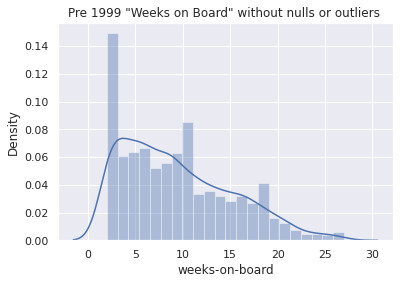

In [ ]:
#PRE 99 WITH NULLS AND OUTLIERS DROPPED HISTOGRAM
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(pre99_dropouts['weeks-on-board'])
plt.title('Pre 1999 "Weeks on Board" without nulls or outliers ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


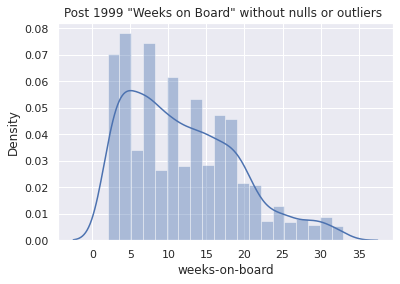

In [ ]:
#POST 99 WITH NULLS AND OUTLIERS DROPPED HISTOGRAM
#histogram to see if this 'normaled' out any with nulls and outliers removed - IT DID NOT (so it's still a non-normal distro)
sns.distplot(post99_dropouts['weeks-on-board'])
plt.title('Post 1999 "Weeks on Board" without nulls or outliers ')
plt.show()

**Shapiro interpretations**


In [ ]:
# WRITING A FUNCTION TO PERFORM REPETITIVE stats.shapiro()
def shapwilk(pre, post):
  pre_shap = stats.shapiro(pre)
  post_shap = stats.shapiro(post)
  return (f"pre_Shapiro: {pre_shap}.",f"post_Shapiro: {post_shap}")

shapwilk (pre99_dropouts['weeks-on-board'], post99_dropouts['weeks-on-board'])

('pre_Shapiro: ShapiroResult(statistic=0.9367316961288452, pvalue=1.5425027889322065e-32).',
 'post_Shapiro: ShapiroResult(statistic=0.9447929859161377, pvalue=4.0655877074036916e-30)')

rule: p-value > 0.05, W stat close to 1  = normal distribution<Br>
"This is a statistical test used to infer whether a variable's distribution is significantly different than normal."

**pre99: 0.93 close to 1, p-value = way less than 0.05 ==> NOT NORMAL<BR>
post99: 0.94 close to 1, p-value = way less than 0.05 ==> NOT NORMAL**

**Histrogram Plots**

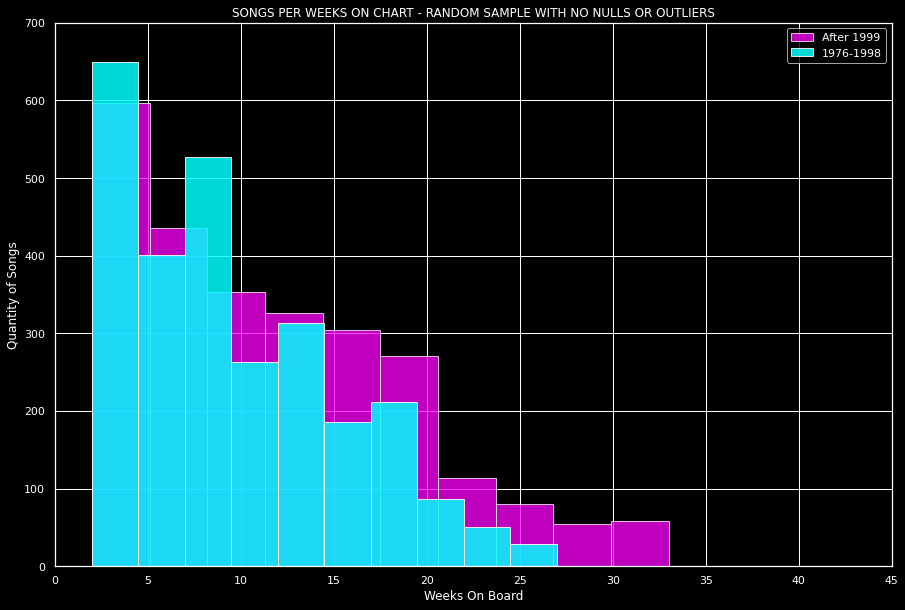

In [ ]:
plt.style.use('dark_background')
fig = plt.figure() 
fig.set_size_inches(15,10)
plt.hist(post99_dropouts['weeks-on-board'], alpha = .75, color = "magenta")
plt.hist(pre99_dropouts['weeks-on-board'], alpha = .85, color = "cyan")
plt.legend(['After 1999','1976-1998'])
plt.title("SONGS PER WEEKS ON CHART - RANDOM SAMPLE WITH NO NULLS OR OUTLIERS")
plt.xticks(range(0,50,5))
plt.yticks(range(0,800,100))
plt.xlabel("Weeks On Board")
plt.ylabel("Quantity of Songs")
plt.show()

NOT A NORMAL BELL CURVE  - THIS IS A NON-NORMAL DISTRIBUTION FROM THIS PLOT (in addition to Shapiro-Wilk results)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe4abccd0>]],
      dtype=object)

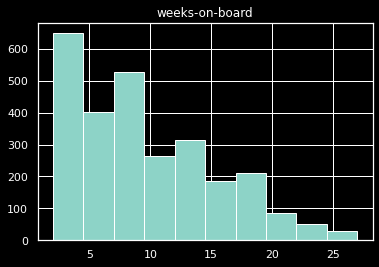

In [ ]:
#individual histogram plots
pre99_dropouts.hist(['weeks-on-board'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe3fb7710>]],
      dtype=object)

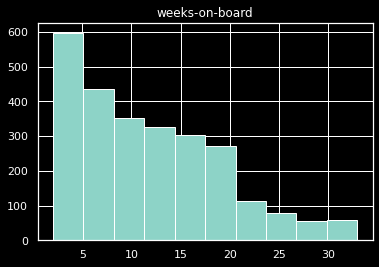

In [ ]:
#individual histogram plots
post99_dropouts.hist(['weeks-on-board'])

AGAIN, NOT NORMAL BELL CURVE DISTRIBUTIONS

**QQ interpretations**

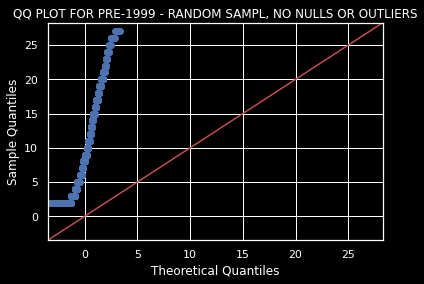

In [ ]:
# plotting QQ on pre99_dropouts
fig = sm.qqplot(pre99_dropouts['weeks-on-board'], line='45')
plt.title("QQ PLOT FOR PRE-1999 - RANDOM SAMPL, NO NULLS OR OUTLIERS")
plt.show()

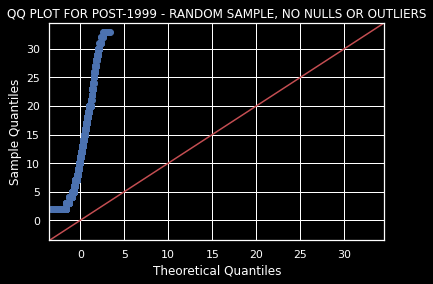

In [ ]:
# plotting QQ on post99_dropouts
fig = sm.qqplot(post99_dropouts['weeks-on-board'], line='45')
plt.title("QQ PLOT FOR POST-1999 - RANDOM SAMPLE, NO NULLS OR OUTLIERS")
plt.show()

THEY DO  NOT LOOK NORMAL AS THEY DO NOT FOLLOW THE 45 LINE


# I DETERMINE THESE 2 DATAFRAMES ARE NOT NORMALLY DISTRIBUTED

based on stats.describe (for included outliers), Shapiro- Wilk results, histogram plots, and QQ plots - I will implement Kruskal-Wallis to test with

In [ ]:
stats.kruskal(pre99_dropouts['weeks-on-board'], post99_dropouts['weeks-on-board'])

KruskalResult(statistic=141.73247728230132, pvalue=1.1126973388846684e-32)

rule: "p-value < 0.05 = you can reject the null that all variables have the same distribution/ "are the same".

**CONCLUSION: WE CAN REJECT THE NULL THAT THERE WAS "NO CHANGE IN CHARTING TIME (WEEKS-ON-BOARD) IN THE DIGITAL AGE FROM 1999 FORWARD".** <BR><BR>

Reject this null hypothesis: Songs charted from 1976-1998 did not have significantly different chart times than songs released after 1999.

The low p-value indicates signficant difference btw "pre99_dropouts for weeks on board" and "post99_dropouts for weeks on board".

# CONFIDENCE INTERVAL CALCULATION

In [ ]:
#confidence interval calculation
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0] # 1976to1998
    sample_2_n = array_2.shape[0] # after99
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var() #squared std deviation
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    print("ci_upper = ", ci_upper)
    print("ci_lower = ", ci_lower)
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(pre99_dropouts['weeks-on-board'],  post99_dropouts['weeks-on-board'])

ci_upper =  2.8209822956455803
ci_lower =  2.1157138658866805


'The difference in means at the 95% confidence interval (two-tail) is between 2.1157138658866805 and 2.8209822956455803.'

WITH 95% CONFIDENCE - CAN SAY THAT "POST-
1999" SONGS STAYED ON CHARTS ON AVERAGE BETWEEN 1.99 AND 2.67 WEEKS LONGER THAN "PRE-1999" SONGS

1.7 vs 2.38<br>
1.9 and 3.67<br>
1.79 and 2.47<br>
2.01 and 2.7<br>
1.69 and 2.38 <br>
1.58 and 2.25<br>
1.68 and 2.34 <br>
1.71 and 2.41 <br>
1.77 and 2.43<br>
1.99 and 2.67<br>
2.11 and 2.78<br>

to check:<BR>
after1999 mean: 12.7 weeks <br>
1976to1998 mean: 9.6 weeks

12.7 - 9.6 = 3.1

CI: 2.69 + 3.5 / 2 = 3.095

In [ ]:
#execute CI function and return an average, not just a range. 
def ci_averages(array_1, array_2):
      sample_1_n = array_1.shape[0] # 1976to1998
      sample_2_n = array_2.shape[0] # after99
      sample_1_mean = array_1.mean()
      sample_2_mean = array_2.mean()
      sample_1_var = array_1.var() #squared std deviation
      sample_2_var = array_2.var()
      mean_difference = sample_2_mean - sample_1_mean
      std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
      margin_of_error = 1.96 * std_err_difference
      ci_lower = mean_difference - margin_of_error
      ci_upper = mean_difference + margin_of_error
      #print(ci_upper)
      #print(ci_lower)
      avg = (ci_upper+ci_lower)/2
      return ("The average weeks that Post99 charts longer than Pre99 is: ", avg)

ci_averages(pre99_dropouts['weeks-on-board'],  post99_dropouts['weeks-on-board'])

('The average weeks that Post99 charts longer than Pre99 is: ',
 2.4683480807661304)

# RECOMMENDATIONS


It's clear that the onset of digital file sharing and streaming services in 1999 affected how long songs chart. With this knowledge, stakeholders such as artists, record labels, streaming services, broadcast radio, and satellite radio should consider how they can **most take advantage of digital music content delivery.**

**Why Digital?**<br>Digital music content delivery in the forms of streaming services (Pandora, Spotify, Amazon music, iTunes, YouTube, etc.) and file sharing/purchases all offer more equitable access and quantifiable exposure and engagement measurements.<br><br>Equitable access means music on-demand, mobile device in hand (mp3 player, to iPod, to cell phone), wifi proliferation, digital connectivy expansion (increase broadband and high capacity infrastructure), and digital payment expansion (CC on file, Apple Pay, etc). Listeners are no longer tied to a radio station broadcast or a record store sale.

Quantifiable exposure and engagement measurement:<br>
Every digital track could return measurable data such as:

* user ID (subscriber ID, email, IP, CC info)
* user system ID (windows, mac, etc.)
* track name
* track artist
* time listened
* user engagement (repeats, FFWD, RW, skip, pause, like, dislike)

Since we know now that songs released after 1999 do tend to chart longer than songs released before 1999, stakeholders such as:
* record labels
* artists
* streaming service providers (Spotify, Pandora, Amazon Music, TikTok, etc.)
* traditional broadcast radio
* satellite radio stations

can use this information to make data-informed decisions regarding content distribution, revenue generation, marketing, and audience development. 

I recommend that stakeholders consider song chart time ("weeks-on-board") in order to help determine things like:

*   **concert tour dates** - lengthy-charted songs (especially multiple lengthy charted songs from the same artist) will more likely generate more ticket sales due to more exposure and engagement (REV)<br>
* **radio clock programming**- long-charted popular hits play an important role in the radio clock (where it is determined when to play what kind of songs during certain hours of the day). It is this programming that builds and maintains audience, which leads to advertising sales based on audience exposure for traditional broadcast radio.(AD)<br>
*   **artists** - artists should consider lengthy-charted hits as to help determine audience/fan preference and whether the artist/band should continue releasing hits in the same style and genre, or, when it's time to perhaps release a new, more contemporary 'sound' for this artist/band. Bands that have been successful in the past of releasing a "new sound" after massive hits in one style are U2, Smashing Pumpkins, Sugar Ray, and The Red Hot Chili Peppers. (CD)<br>
* **album/song releases** - similar to artists style as mentioned above, monitoring song charting length can help record labels and artists determine when to release new tracks(CD)<BR>
* **advertising sales/subscribers** - lengthy-charted songs will play an important role in keeping audiences engaged and active, in both traditional broadcast radio and streaming services. Audiences tune in to hear and download their favorite songs as well has hear new music. But it's the familiarity with the old that keeps a listener engaged and coming back. And it's this "audience stickiness" that advertisers want to reach and pay money for.(M, AD, REV)
* **audience development** - lengthy-charted songs contribute to audience development in terms of radio clock programming, advertising sales, and even niche programming when tailoring a station's format or streaming services channels to long-charted popular hits (Sirius XM Satellite radio has niche channels like all hits from Pearl Jam, The Grateful Dead, and Dave Matthews Band). The goal of audience dvelopment is to build a relationship with listeners, gain new listeners, and develop loyal listeners. Lengthy-charted songs can help ensure that listeners find joy, comfort, and familiarity in the music and keep coming back for more. (AD)
* **sales:** - Continual declining sales of physical music media and digital music media since 2003 --> Don't invest in production or sales of physical media, or digital file purchases. Instead, consider investing in marketing/advertising on streaming media.<br>

sales data sources: <br>
 https://www.statista.com/statistics/239276/growth-of-the-global-music-revenue-by-type/#:~:text=Digital%20music%20streaming%20has%20rapidly,over%20half%20of%20all%20revenue

 https://www.toptal.com/finance/market-research-analysts/state-of-music-industry

 https://soundcharts.com/blog/us-music-market-overview#streaming-is-king

 RIAA data: https://www.riaa.com/u-s-sales-database/

 https://www.engadget.com/riaa-music-revenue-report-2020-204907874.html

RIAA end of year 2020 report:
 https://www.riaa.com/wp-content/uploads/2021/02/2020-Year-End-Music-Industry-Revenue-Report.pdf

 RIAA end of year 2021: https://www.riaa.com/wp-content/uploads/2022/03/2021-Year-End-Music-Industry-Revenue-Report.pdf


digital media changes how songs break: https://www.wired.com/2017/05/secret-hit-making-power-spotify-playlist/




**FURTHER RESEARCH SUGGESTIONS:**

My next suggestions would be to examine the data with predictive modelling to determine if there are patterns or correlations between previous lengths of time on the charts and future potential hit songs. Can current long-charting songs predict an estimated time-on-chart of future hits? 

I would also like to dig deeper into what happens around a breakpoint of weeks 20-22 for both pre-1999 and post-1999. This period seems to be a turning point for both data sets and I'd like to see if there's something in the data that can help define this, or if this an external influence (outside the data).

I would also explore the music styles of pre-1999 and post-1999 to see if genres (especially new genres) influenced time-on-charts. Did songs/artists with more hip-hop sound, or more electronic sound, produce longer-charting hits? Was there a pattern or correlation in the style of music (based on artist) that play a role in time-on-charts?
